# For what to use these libraries

# Data Cleaning Options

# Sparse Matrix

If most of the elements of the matrix are zero then it is called sparse matrix.

# Bag of Words

# TF-idf ---> Term frequency term inverse document frequency

How many times a word occur in terms of whole document.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('spam.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
len(df)

5572

In [7]:
df["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [11]:
ham = df[df["label"]=="ham"]

In [13]:
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [15]:
spam = df[df["label"]=="spam"]

In [16]:
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [20]:
ham.shape, spam.shape

((4825, 4), (747, 4))

# Balancing the data

In [21]:
ham = ham.sample(spam.shape[0])

In [22]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [23]:
data = ham.append(spam, ignore_index =True)

In [24]:
data.head()

,label,message,length,punct
0,ham,K.then any other special?,25,2
1,ham,"Yeah, probably earlier than that",32,1
2,ham,Love you aathi..love u lot..,28,4
3,ham,Pls ask macho how much is budget for bb bold 2...,94,6
4,ham,Tired. I haven't slept well the past few nights.,48,3


In [25]:
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


# Exploratory Data Analysis

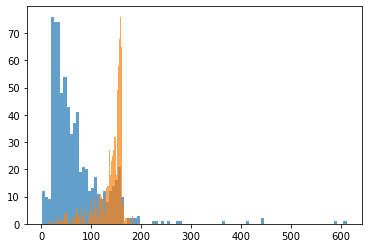

In [29]:
plt.hist(data[data["label"]=="ham"]["length"], bins=100, alpha=0.7)
plt.hist(data[data["label"]=="spam"]["length"], bins = 100, alpha=0.7)
plt.show()

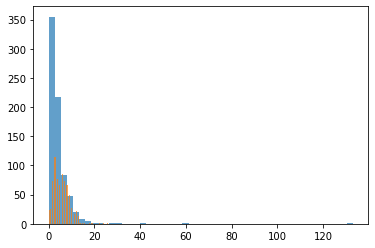

In [31]:
plt.hist(data[data["label"]=="ham"]["punct"], bins=50, alpha=0.7)
plt.hist(data[data["label"]=="spam"]["punct"], bins = 50, alpha=0.7)
plt.show()

# Data Preparation

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.pipeline import Pipeline

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
data.head()

,label,message,length,punct
0,ham,K.then any other special?,25,2
1,ham,"Yeah, probably earlier than that",32,1
2,ham,Love you aathi..love u lot..,28,4
3,ham,Pls ask macho how much is budget for bb bold 2...,94,6
4,ham,Tired. I haven't slept well the past few nights.,48,3


In [36]:
data.shape

(1494, 4)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(data["message"], data["label"], test_size = 0.3, random_state=101, stratify = data["label"])

# Bag of Words creation

In [39]:
vectorizer = TfidfVectorizer()

In [40]:
X_train = vectorizer.fit_transform(X_train)

In [41]:
X_train

<1045x3770 sparse matrix of type '<class 'numpy.float64'>'
	with 17570 stored elements in Compressed Sparse Row format>

# Pipeline and RF

In [44]:
clf = Pipeline([("tfidf", TfidfVectorizer()), ("clf", RandomForestClassifier(n_estimators=100,n_jobs=-1))])

In [47]:
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [48]:
y_pred = clf.predict(X_test)

In [53]:
confusion_matrix(y_test, y_pred)

array([[222,   2],
       [ 20, 205]], dtype=int64)

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.99      0.95       224
        spam       0.99      0.91      0.95       225

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [55]:
print(accuracy_score(y_test,y_pred))

0.9510022271714922


In [59]:
clf.predict({"Congratulations, we are offering you a job."})

array(['ham'], dtype=object)

In [62]:
clf.predict({"Congratulations, you won the free ticket to USA"})

array(['spam'], dtype=object)

# SVM

In [71]:
clf = Pipeline([("tfidf", TfidfVectorizer()), ("clf", SVC(C=1000, gamma="auto"))])

In [72]:
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', SVC(C=1000, gamma='auto'))])

In [73]:
y_pred = clf.predict(X_test)

In [74]:
confusion_matrix(y_test, y_pred)

array([[219,   5],
       [ 14, 211]], dtype=int64)

In [75]:
print(accuracy_score(y_test,y_pred))

0.9576837416481069


In [76]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

         ham       0.94      0.98      0.96       224
        spam       0.98      0.94      0.96       225

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



In [77]:
clf.predict({"feeling okay?"})

array(['ham'], dtype=object)

In [78]:
clf.predict({"Congratulations, you won the free ticket to USA"})

array(['spam'], dtype=object)